In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

LOG_IMAGE_PATH = '../images/e3/log_image.tif'
POWER_LAW_IMAGE1_PATH = '../images/e3/power_law_gamma_low.tif'
POWER_LAW_IMAGE2_PATH = '../images/e3/power_law_gamma_high.tif'
NEGATION_PATH = '../images/e3/negate.tif'

def readImage(imagePath):
    # read the image
    image_original = mpimg.imread(imagePath)
    image = image_original.copy() # else it is read only

    if len(image.shape) == 3:
        # is a color image
        # converting to grayscale: avg method
        R = image[:,:, 0]
        G = image[:,:, 1]
        B = image[:,:, 2]
        grayscale = (R/3 + G/3 + B/3)
    else:
        # is a grayscale image
        grayscale = np.array(image_original.copy())

    plt.imshow(grayscale, cmap='gray')
    plt.title('original gray image')
    
    return grayscale

# log s = c * log(1+r)
def logTransform(grayImage ,c):
    log_image = c * np.log10(grayImage + 1.0000000000001) # needed to avoid log(1) = 0 error
    plt.imshow(log_image, cmap='gray')
    plt.title('log transform with c = ' + str(c))

# power law s = c * r^(gamma)
def powerLawTransform(grayImage, c, gamma):
    power_image = c * np.power(grayImage, gamma)
    plt.imshow(power_image, cmap='gray')
    plt.title('log transform with c = '+ str(c) + ' & gamma = ' + str(gamma))
    
    
def negateImage(grayImage):
    # negate grayscale image
    grayscale_neg = 255 - grayImage
    plt.imshow(grayscale_neg, cmap=plt.get_cmap('gray'),vmin=0, vmax=255)
    plt.title('Negative Image')

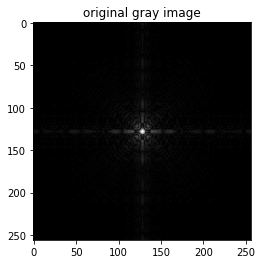

In [3]:
img1 = readImage(LOG_IMAGE_PATH)

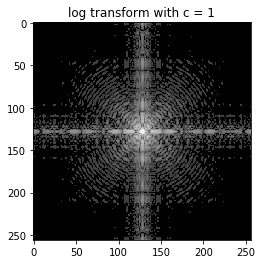

In [4]:
logTransform(img1, 1)

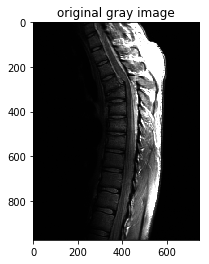

In [5]:
img2 = readImage(POWER_LAW_IMAGE1_PATH)

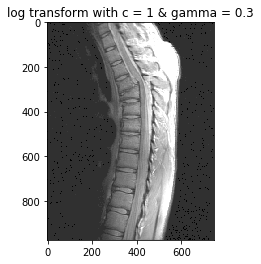

In [6]:
powerLawTransform(img2, 1, 0.3)

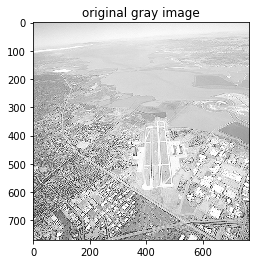

In [7]:
img3 = readImage(POWER_LAW_IMAGE2_PATH)

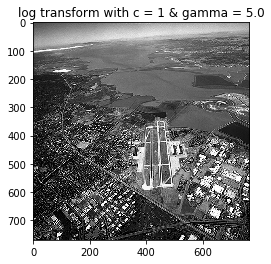

In [8]:
powerLawTransform(img3, 1, 5.0)

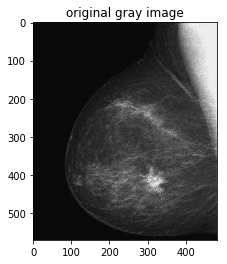

In [9]:
img4 = readImage(NEGATION_PATH)

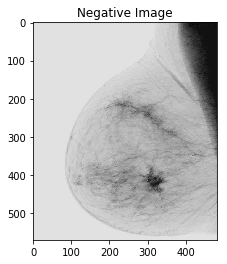

In [10]:
negateImage(img4)